# AlphaCare Insurance Solutions - Exploratory Data Analysis
## Task 1: Data Understanding and Initial Insights

**Objective**: Analyze South African car insurance data to identify low-risk segments and understand loss ratio patterns.

**Dataset Period**: February 2014 - August 2015

**Key Metric**: Loss Ratio = TotalClaims / TotalPremium

## 1. Setup and Data Loading

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create output directory if it doesn't exist
import os
os.makedirs('../outputs/plots', exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the pipe-delimited dataset
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|', low_memory=False)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")


Dataset loaded successfully!
Shape: 1,000,098 rows × 52 columns


## 2. Initial Data Exploration

In [6]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [8]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

In [9]:
# Column names
print(f"Total columns: {len(df.columns)}\n")
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Total columns: 52

Column names:
 1. UnderwrittenCoverID
 2. PolicyID
 3. TransactionMonth
 4. IsVATRegistered
 5. Citizenship
 6. LegalType
 7. Title
 8. Language
 9. Bank
10. AccountType
11. MaritalStatus
12. Gender
13. Country
14. Province
15. PostalCode
16. MainCrestaZone
17. SubCrestaZone
18. ItemType
19. mmcode
20. VehicleType
21. RegistrationYear
22. make
23. Model
24. Cylinders
25. cubiccapacity
26. kilowatts
27. bodytype
28. NumberOfDoors
29. VehicleIntroDate
30. CustomValueEstimate
31. AlarmImmobiliser
32. TrackingDevice
33. CapitalOutstanding
34. NewVehicle
35. WrittenOff
36. Rebuilt
37. Converted
38. CrossBorder
39. NumberOfVehiclesInFleet
40. SumInsured
41. TermFrequency
42. CalculatedPremiumPerTerm
43. ExcessSelected
44. CoverCategory
45. CoverType
46. CoverGroup
47. Section
48. Product
49. StatutoryClass
50. StatutoryRiskType
51. TotalPremium
52. TotalClaims


## 3. Data Type Conversions

In [10]:
# Check current data types
print("Current data types:")
print(df.dtypes.value_counts())
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Current data types:
object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

Memory usage: 2124.34 MB


In [11]:
# Convert date columns
date_columns = ['TransactionMonth', 'VehicleIntroDate']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Converted {col} to datetime")

# Extract temporal features from TransactionMonth
if 'TransactionMonth' in df.columns:
    df['TransactionYear'] = df['TransactionMonth'].dt.year
    df['TransactionMonthNum'] = df['TransactionMonth'].dt.month
    df['TransactionQuarter'] = df['TransactionMonth'].dt.quarter
    print("\nExtracted temporal features from TransactionMonth")

Converted TransactionMonth to datetime
Converted VehicleIntroDate to datetime

Extracted temporal features from TransactionMonth


In [12]:
# Convert categorical columns to category dtype for memory optimization
categorical_columns = [
    'Province', 'Gender', 'VehicleType', 'MaritalStatus', 'Title', 'Language',
    'CoverType', 'CoverCategory', 'Product', 'CoverGroup', 'Section',
    'make', 'Model', 'bodytype', 'Citizenship', 'LegalType', 'Bank', 'AccountType'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

print(f"Converted {len([c for c in categorical_columns if c in df.columns])} columns to category dtype")
print(f"\nNew memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Converted 18 columns to category dtype

New memory usage: 982.82 MB


## 4. Missing Values Analysis

In [13]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print(f"Columns with missing values: {len(missing_data)}\n")
print(missing_data.to_string())

Columns with missing values: 22

                     Column  Missing_Count  Missing_Percentage
0   NumberOfVehiclesInFleet        1000098          100.000000
1               CrossBorder         999400           99.930207
2       CustomValueEstimate         779642           77.956560
3                WrittenOff         641901           64.183810
4                 Converted         641901           64.183810
5                   Rebuilt         641901           64.183810
6                NewVehicle         153295           15.327998
7                      Bank         145961           14.594670
8               AccountType          40232            4.022806
9                    Gender           9536            0.953507
10            MaritalStatus           8259            0.825819
11                   mmcode            552            0.055195
12              VehicleType            552            0.055195
13                     make            552            0.055195
14         VehicleIntr

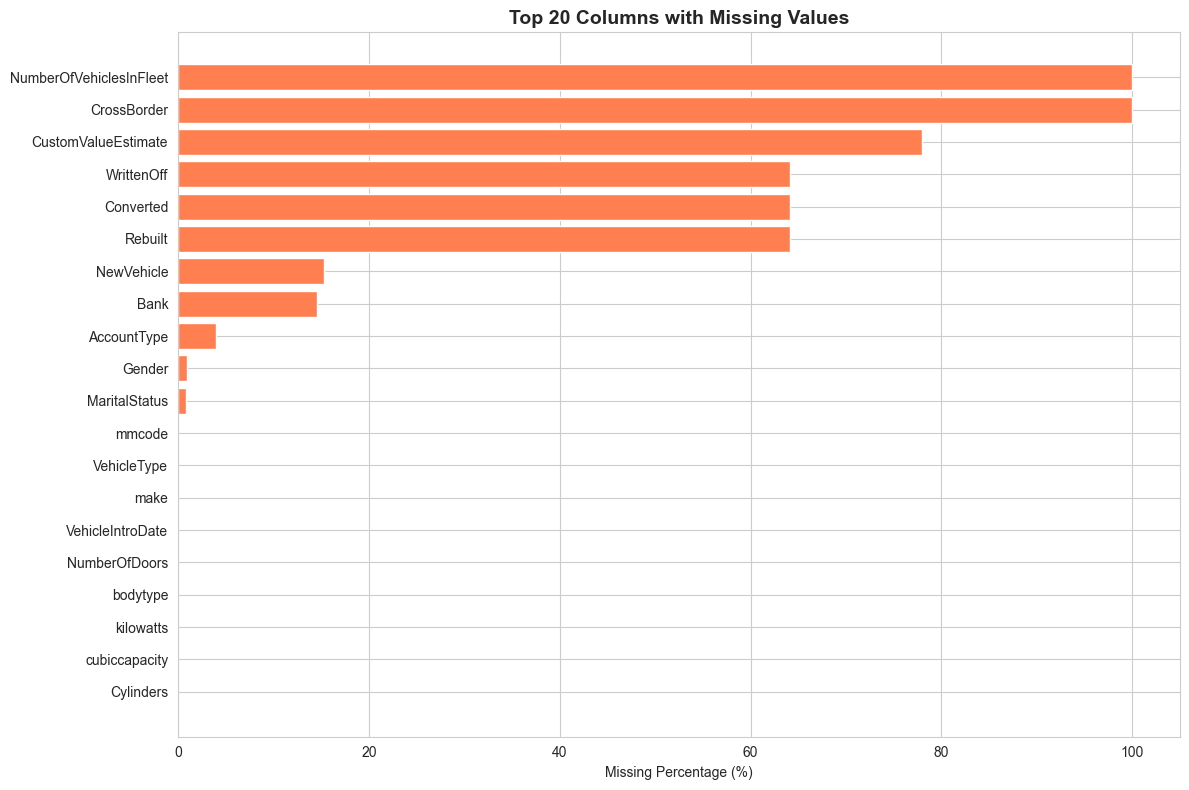

Missing values plot saved to outputs/plots/missing_values.png


In [14]:
# Visualize missing values for top columns
if len(missing_data) > 0:
    top_missing = missing_data.head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(top_missing['Column'], top_missing['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../outputs/plots/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Missing values plot saved to outputs/plots/missing_values.png")

## 5. Summary Statistics

In [15]:
# Descriptive statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
df.describe()

Summary Statistics for Numeric Columns:


,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,TransactionYear,TransactionMonthNum,TransactionQuarter
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,999546,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2008-04-20 17:04:04.990425600,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01,2.014754e+03,5.905323e+00,2.311760e+00
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,1977-10-01 00:00:00,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04,2.013000e+03,1.000000e+00,1.000000e+00
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,2007-11-01 00:00:00,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00,2.015000e+03,3.000000e+00,1.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2010-10-01 00:00:00,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00,2.015000e+03,6.000000e+00,2.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2012-04-01 00:00:00,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00,2.015000e+03,8.000000e+00,3.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2014-09-01 00:00:00,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05,2.015000e+03,1.200000e+01,4.000000e+00
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,NaN,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03,4.370288e-01,3.083934e+00,1.008612e+00


In [16]:
# Key financial metrics
print("Key Financial Metrics:")
print("="*60)

if 'TotalPremium' in df.columns:
    print(f"\nTotal Premium:")
    print(f"  Sum: R {df['TotalPremium'].sum():,.2f}")
    print(f"  Mean: R {df['TotalPremium'].mean():,.2f}")
    print(f"  Median: R {df['TotalPremium'].median():,.2f}")
    print(f"  Std Dev: R {df['TotalPremium'].std():,.2f}")

if 'TotalClaims' in df.columns:
    print(f"\nTotal Claims:")
    print(f"  Sum: R {df['TotalClaims'].sum():,.2f}")
    print(f"  Mean: R {df['TotalClaims'].mean():,.2f}")
    print(f"  Median: R {df['TotalClaims'].median():,.2f}")
    print(f"  Std Dev: R {df['TotalClaims'].std():,.2f}")
    
    # Claim statistics
    policies_with_claims = (df['TotalClaims'] > 0).sum()
    claim_rate = (policies_with_claims / len(df)) * 100
    print(f"\nClaim Statistics:")
    print(f"  Policies with claims: {policies_with_claims:,} ({claim_rate:.2f}%)")
    print(f"  Policies without claims: {(df['TotalClaims'] == 0).sum():,}")

Key Financial Metrics:

Total Premium:
  Sum: R 61,911,562.70
  Mean: R 61.91
  Median: R 2.18
  Std Dev: R 230.28

Total Claims:
  Sum: R 64,867,546.17
  Mean: R 64.86
  Median: R 0.00
  Std Dev: R 2,384.07

Claim Statistics:
  Policies with claims: 2,788 (0.28%)
  Policies without claims: 997,305


In [17]:
# Categorical variable distributions
categorical_vars = ['Province', 'Gender', 'VehicleType', 'CoverType']

for var in categorical_vars:
    if var in df.columns:
        print(f"\n{var} Distribution:")
        print("="*60)
        value_counts = df[var].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        dist_df = pd.DataFrame({
            'Count': value_counts,
            'Percentage': percentages
        })
        print(dist_df.to_string())


Province Distribution:
                Count  Percentage
Province                         
Gauteng        393865   39.382641
Western Cape   170796   17.077926
KwaZulu-Natal  169781   16.976436
North West     143287   14.327296
Mpumalanga      52718    5.271283
Eastern Cape    30336    3.033303
Limpopo         24836    2.483357
Free State       8099    0.809821
Northern Cape    6380    0.637937

Gender Distribution:
                Count  Percentage
Gender                           
Not specified  940990   94.089779
Male            42817    4.281280
Female           6755    0.675434

VehicleType Distribution:
                    Count  Percentage
VehicleType                          
Passenger Vehicle  933598   93.350652
Medium Commercial   53985    5.397971
Heavy Commercial     7401    0.740027
Light Commercial     3897    0.389662
Bus                   665    0.066493

CoverType Distribution:
                                                      Count  Percentage
CoverType           

## 6. Loss Ratio Analysis

In [18]:
# Calculate overall loss ratio
if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    total_premium = df['TotalPremium'].sum()
    total_claims = df['TotalClaims'].sum()
    overall_loss_ratio = (total_claims / total_premium) * 100 if total_premium > 0 else 0
    
    print("Overall Loss Ratio Analysis")
    print("="*60)
    print(f"Total Premium Collected: R {total_premium:,.2f}")
    print(f"Total Claims Paid: R {total_claims:,.2f}")
    print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}%")
    print(f"\nInterpretation: For every R1 in premium, R{overall_loss_ratio/100:.2f} is paid in claims")
    
    if overall_loss_ratio < 100:
        print(f"Status: PROFITABLE (Loss ratio < 100%)")
    else:
        print(f"Status: UNPROFITABLE (Loss ratio >= 100%)")

Overall Loss Ratio Analysis
Total Premium Collected: R 61,911,562.70
Total Claims Paid: R 64,867,546.17
Overall Loss Ratio: 104.77%

Interpretation: For every R1 in premium, R1.05 is paid in claims
Status: UNPROFITABLE (Loss ratio >= 100%)


### 6.1 Loss Ratio by Province


Loss Ratio by Province:
     Province  TotalPremium  TotalClaims  PolicyCount  LossRatio
Northern Cape  3.165581e+05 8.949051e+04         6380  28.269855
 Eastern Cape  2.140104e+06 1.356427e+06        30336  63.381348
      Limpopo  1.537324e+06 1.016477e+06        24836  66.119854
   Free State  5.213632e+05 3.549223e+05         8099  68.075814
   Mpumalanga  2.836292e+06 2.044675e+06        52718  72.089735
   North West  7.490508e+06 5.920250e+06       143287  79.036694
 Western Cape  9.806559e+06 1.038977e+07       170796 105.947196
KwaZulu-Natal  1.320908e+07 1.430138e+07       169781 108.269332
      Gauteng  2.405377e+07 2.939415e+07       393865 122.201812


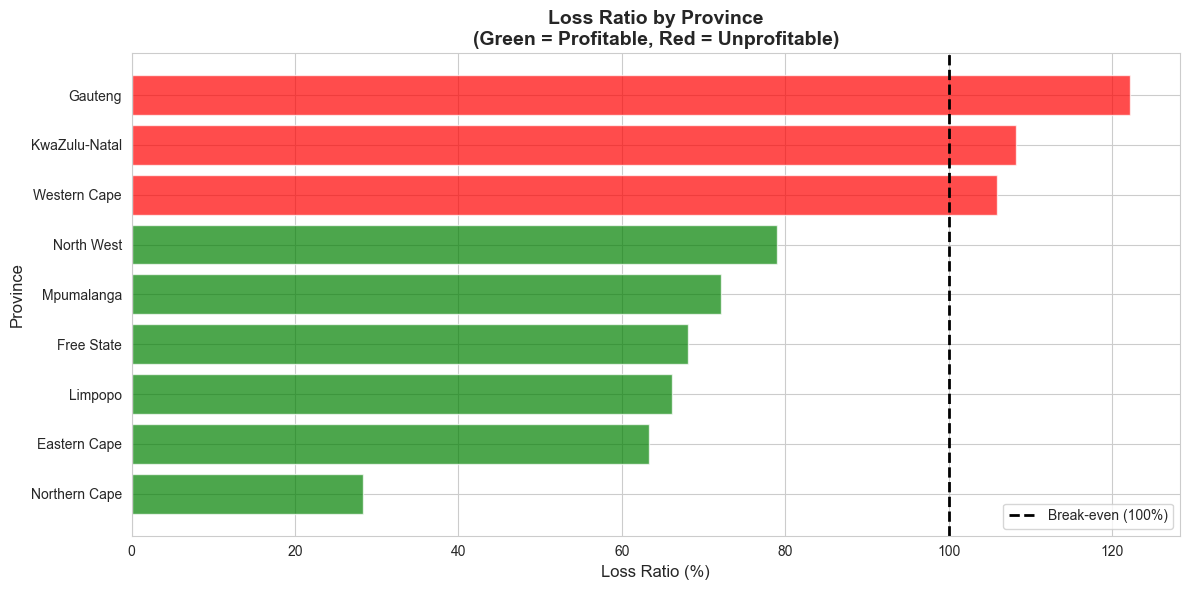


Plot saved to outputs/plots/loss_ratio_by_province.png


In [19]:
# Loss ratio by province
if 'Province' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    province_analysis = df.groupby('Province').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    province_analysis.columns = ['Province', 'TotalPremium', 'TotalClaims', 'PolicyCount']
    province_analysis['LossRatio'] = (province_analysis['TotalClaims'] / province_analysis['TotalPremium']) * 100
    province_analysis = province_analysis.sort_values('LossRatio', ascending=True)
    
    print("\nLoss Ratio by Province:")
    print("="*80)
    print(province_analysis.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(12, 6))
    colors = ['green' if x < 100 else 'red' for x in province_analysis['LossRatio']]
    plt.barh(province_analysis['Province'], province_analysis['LossRatio'], color=colors, alpha=0.7)
    plt.axvline(x=100, color='black', linestyle='--', linewidth=2, label='Break-even (100%)')
    plt.xlabel('Loss Ratio (%)', fontsize=12)
    plt.ylabel('Province', fontsize=12)
    plt.title('Loss Ratio by Province\n(Green = Profitable, Red = Unprofitable)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../outputs/plots/loss_ratio_by_province.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nPlot saved to outputs/plots/loss_ratio_by_province.png")

### 6.2 Loss Ratio by Vehicle Type


Loss Ratio by Vehicle Type:
      VehicleType  TotalPremium  TotalClaims  PolicyCount  LossRatio
              Bus  5.824474e+04 7.996535e+03          665  13.729197
 Light Commercial  2.604975e+05 6.045250e+04         3897  23.206555
Passenger Vehicle  5.664202e+07 5.937207e+07       933598 104.819837
Medium Commercial  3.922746e+06 4.119867e+06        53985 105.025086
 Heavy Commercial  4.609479e+05 7.504746e+05         7401 162.811164


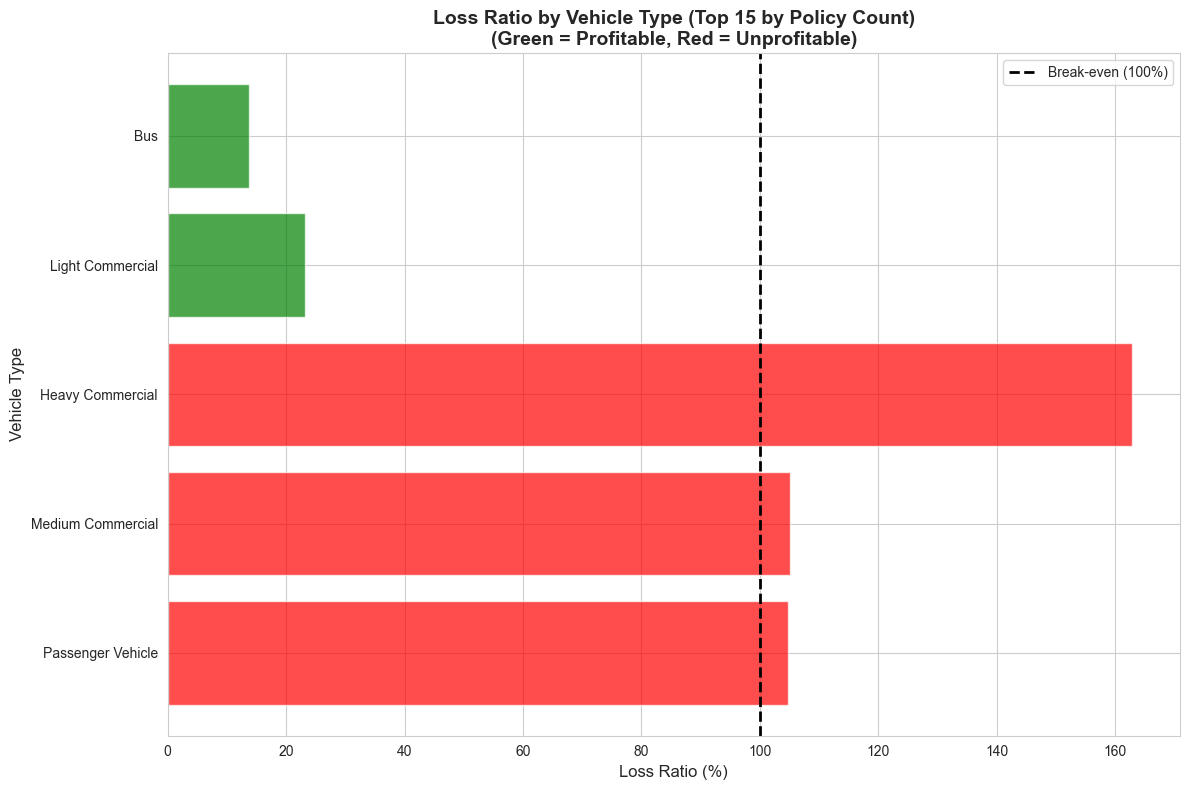


Plot saved to outputs/plots/loss_ratio_by_vehicle_type.png


In [20]:
# Loss ratio by vehicle type
if 'VehicleType' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    vehicle_analysis = df.groupby('VehicleType').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    vehicle_analysis.columns = ['VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
    vehicle_analysis['LossRatio'] = (vehicle_analysis['TotalClaims'] / vehicle_analysis['TotalPremium']) * 100
    vehicle_analysis = vehicle_analysis.sort_values('LossRatio', ascending=True)
    
    print("\nLoss Ratio by Vehicle Type:")
    print("="*80)
    print(vehicle_analysis.to_string(index=False))
    
    # Visualize top vehicle types
    top_vehicles = vehicle_analysis.nlargest(15, 'PolicyCount')
    
    plt.figure(figsize=(12, 8))
    colors = ['green' if x < 100 else 'red' for x in top_vehicles['LossRatio']]
    plt.barh(top_vehicles['VehicleType'], top_vehicles['LossRatio'], color=colors, alpha=0.7)
    plt.axvline(x=100, color='black', linestyle='--', linewidth=2, label='Break-even (100%)')
    plt.xlabel('Loss Ratio (%)', fontsize=12)
    plt.ylabel('Vehicle Type', fontsize=12)
    plt.title('Loss Ratio by Vehicle Type (Top 15 by Policy Count)\n(Green = Profitable, Red = Unprofitable)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../outputs/plots/loss_ratio_by_vehicle_type.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nPlot saved to outputs/plots/loss_ratio_by_vehicle_type.png")

### 6.3 Loss Ratio by Gender


Loss Ratio by Gender:
       Gender  TotalPremium  TotalClaims  PolicyCount  LossRatio
       Female  3.044806e+05 2.502461e+05         6755  82.187876
         Male  1.580143e+06 1.396704e+06        42817  88.390993
Not specified  5.920275e+07 6.271410e+07       940990 105.931060


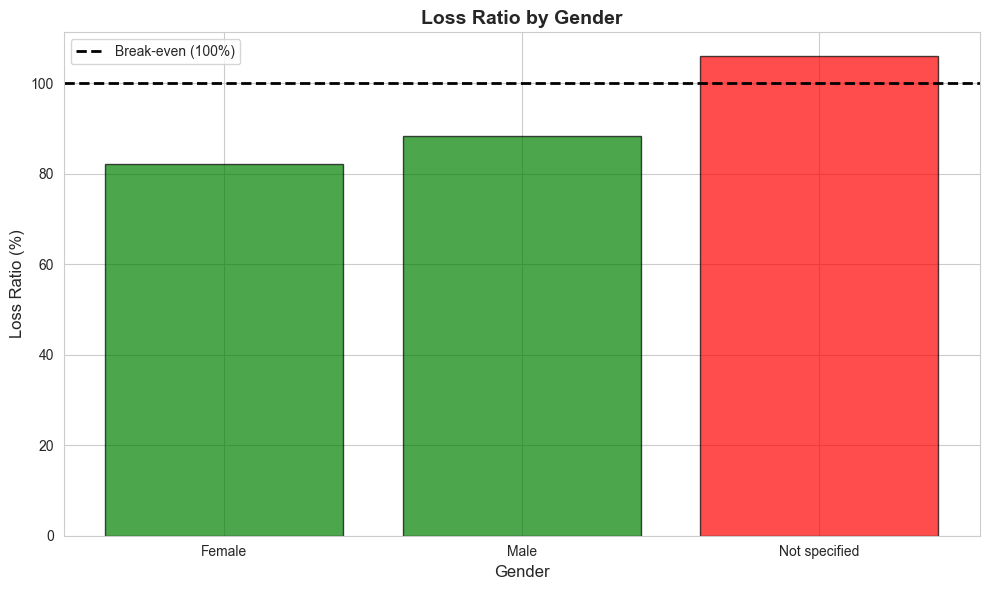


Plot saved to outputs/plots/loss_ratio_by_gender.png


In [21]:
# Loss ratio by gender
if 'Gender' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    gender_analysis = df.groupby('Gender').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    gender_analysis.columns = ['Gender', 'TotalPremium', 'TotalClaims', 'PolicyCount']
    gender_analysis['LossRatio'] = (gender_analysis['TotalClaims'] / gender_analysis['TotalPremium']) * 100
    
    print("\nLoss Ratio by Gender:")
    print("="*80)
    print(gender_analysis.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(10, 6))
    colors = ['green' if x < 100 else 'red' for x in gender_analysis['LossRatio']]
    plt.bar(gender_analysis['Gender'], gender_analysis['LossRatio'], color=colors, alpha=0.7, edgecolor='black')
    plt.axhline(y=100, color='black', linestyle='--', linewidth=2, label='Break-even (100%)')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Loss Ratio (%)', fontsize=12)
    plt.title('Loss Ratio by Gender', fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../outputs/plots/loss_ratio_by_gender.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nPlot saved to outputs/plots/loss_ratio_by_gender.png")

## 7. Claim Frequency and Severity

In [22]:
# Claim Frequency Analysis
if 'TotalClaims' in df.columns:
    print("Claim Frequency Analysis")
    print("="*60)
    
    # Overall claim frequency
    total_policies = len(df)
    policies_with_claims = (df['TotalClaims'] > 0).sum()
    claim_frequency = (policies_with_claims / total_policies) * 100
    
    print(f"Total Policies: {total_policies:,}")
    print(f"Policies with Claims: {policies_with_claims:,}")
    print(f"Overall Claim Frequency: {claim_frequency:.2f}%")
    
    # Claim frequency by province
    if 'Province' in df.columns:
        print("\nClaim Frequency by Province:")
        province_freq = df.groupby('Province').apply(
            lambda x: ((x['TotalClaims'] > 0).sum() / len(x)) * 100
        ).sort_values(ascending=False)
        print(province_freq.to_string())
    
    # Claim frequency by vehicle type
    if 'VehicleType' in df.columns:
        print("\nClaim Frequency by Vehicle Type (Top 10):")
        vehicle_freq = df.groupby('VehicleType').apply(
            lambda x: ((x['TotalClaims'] > 0).sum() / len(x)) * 100
        ).sort_values(ascending=False).head(10)
        print(vehicle_freq.to_string())

Claim Frequency Analysis
Total Policies: 1,000,098
Policies with Claims: 2,788
Overall Claim Frequency: 0.28%

Claim Frequency by Province:
Province
Gauteng          0.335648
KwaZulu-Natal    0.284484
Limpopo          0.269770
North West       0.243567
Mpumalanga       0.242801
Western Cape     0.216633
Eastern Cape     0.164821
Free State       0.135819
Northern Cape    0.125392

Claim Frequency by Vehicle Type (Top 10):
VehicleType
Medium Commercial    0.292674
Heavy Commercial     0.283745
Passenger Vehicle    0.277100
Light Commercial     0.205286
Bus                  0.150376


In [23]:
# Claim Severity Analysis
if 'TotalClaims' in df.columns:
    print("\nClaim Severity Analysis")
    print("="*60)
    
    # Filter policies with claims
    df_with_claims = df[df['TotalClaims'] > 0].copy()
    
    if len(df_with_claims) > 0:
        avg_claim_severity = df_with_claims['TotalClaims'].mean()
        median_claim_severity = df_with_claims['TotalClaims'].median()
        
        print(f"Average Claim Severity: R {avg_claim_severity:,.2f}")
        print(f"Median Claim Severity: R {median_claim_severity:,.2f}")
        
        # Claim severity by province
        if 'Province' in df.columns:
            print("\nClaim Severity by Province:")
            province_severity = df_with_claims.groupby('Province')['TotalClaims'].mean().sort_values(ascending=False)
            print(province_severity.to_string())
        
        # Claim severity by vehicle type
        if 'VehicleType' in df.columns:
            print("\nClaim Severity by Vehicle Type (Top 10):")
            vehicle_severity = df_with_claims.groupby('VehicleType')['TotalClaims'].mean().sort_values(ascending=False).head(10)
            print(vehicle_severity.to_string())


Claim Severity Analysis
Average Claim Severity: R 23,273.39
Median Claim Severity: R 6,140.35

Claim Severity by Province:
Province
Free State       32265.661085
KwaZulu-Natal    29609.487473
Western Cape     28095.849881
Eastern Cape     27128.533277
Gauteng          22243.878396
North West       16963.467035
Mpumalanga       15979.553421
Limpopo          15171.294187
Northern Cape    11186.313596

Claim Severity by Vehicle Type (Top 10):
VehicleType
Heavy Commercial     35736.884921
Medium Commercial    26075.106972
Passenger Vehicle    22957.374038
Bus                   7996.535088
Light Commercial      7556.562500


## 8. Outlier Detection

In [24]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Detect outliers in key columns
outlier_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']

print("Outlier Detection (IQR Method)")
print("="*80)

for col in outlier_columns:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_pct = (len(outliers) / len(df)) * 100
        
        print(f"\n{col}:")
        print(f"  Lower Bound: R {lower:,.2f}")
        print(f"  Upper Bound: R {upper:,.2f}")
        print(f"  Outliers: {len(outliers):,} ({outlier_pct:.2f}%)")
        
        if len(outliers) > 0:
            print(f"  Min Outlier: R {outliers[col].min():,.2f}")
            print(f"  Max Outlier: R {outliers[col].max():,.2f}")

Outlier Detection (IQR Method)

TotalPremium:
  Lower Bound: R -32.89
  Upper Bound: R 54.82
  Outliers: 209,042 (20.90%)
  Min Outlier: R -782.58
  Max Outlier: R 65,282.60

TotalClaims:
  Lower Bound: R 0.00
  Upper Bound: R 0.00
  Outliers: 2,793 (0.28%)
  Min Outlier: R -12,002.41
  Max Outlier: R 393,092.11

SumInsured:
  Lower Bound: R -362,500.00
  Upper Bound: R 617,500.00
  Outliers: 104,294 (10.43%)
  Min Outlier: R 625,000.00
  Max Outlier: R 12,636,200.00


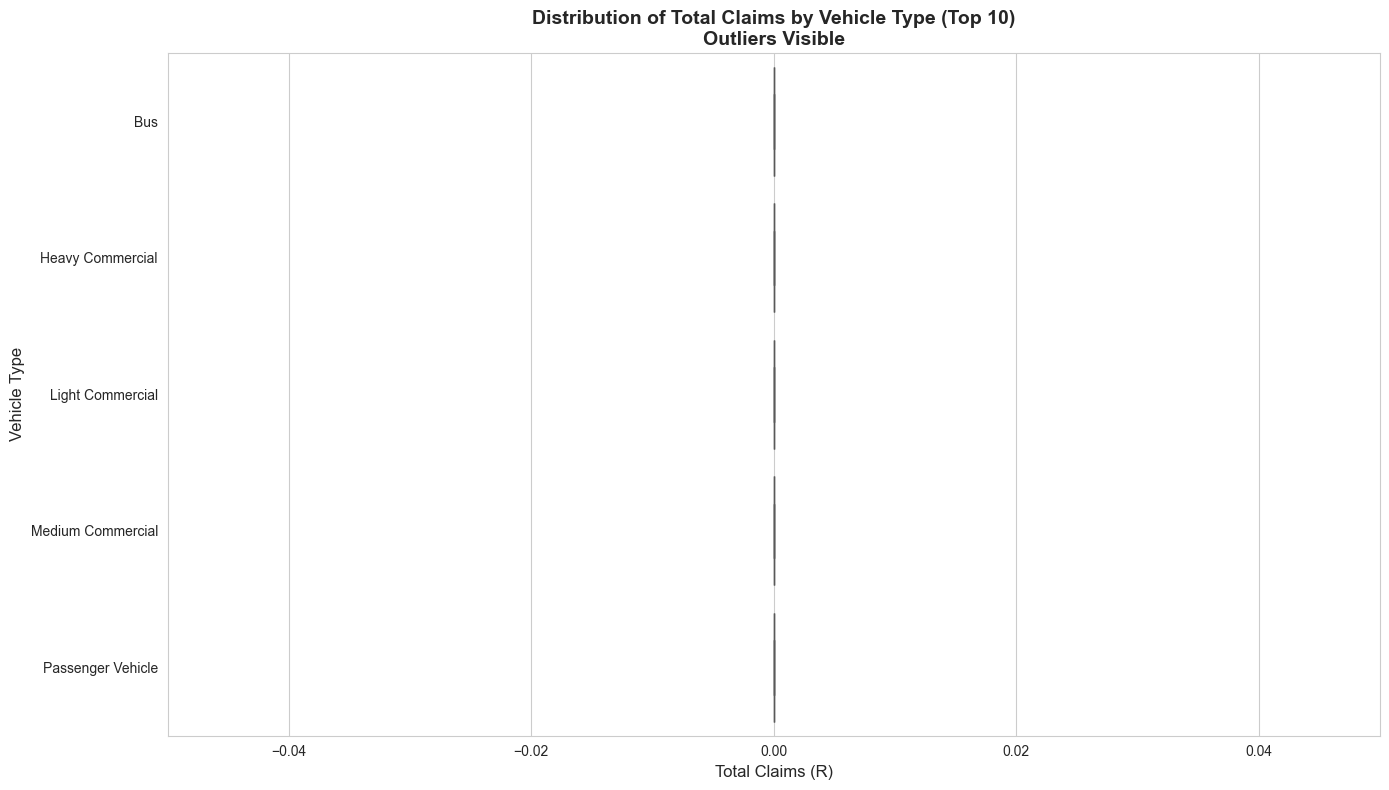

Boxplot saved to outputs/plots/boxplot_claims_by_vehicle.png


In [25]:
# Boxplot for TotalClaims by VehicleType
if 'VehicleType' in df.columns and 'TotalClaims' in df.columns:
    # Get top 10 vehicle types by count
    top_vehicle_types = df['VehicleType'].value_counts().head(10).index
    df_top_vehicles = df[df['VehicleType'].isin(top_vehicle_types)].copy()
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_top_vehicles, y='VehicleType', x='TotalClaims', palette='Set2')
    plt.xlabel('Total Claims (R)', fontsize=12)
    plt.ylabel('Vehicle Type', fontsize=12)
    plt.title('Distribution of Total Claims by Vehicle Type (Top 10)\nOutliers Visible', 
              fontsize=14, fontweight='bold')
    plt.xlim(0, df_top_vehicles['TotalClaims'].quantile(0.95))  # Limit x-axis for better visibility
    plt.tight_layout()
    plt.savefig('../outputs/plots/boxplot_claims_by_vehicle.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Boxplot saved to outputs/plots/boxplot_claims_by_vehicle.png")

## 9. Time Series Analysis

Monthly Trends:
     Month  TotalPremium  TotalClaims  PolicyCount  LossRatio
2013-10-01  3.710635e+02 0.000000e+00           45   0.000000
2013-11-01  2.130747e+04 5.058508e+04         1196 237.405408
2013-12-01  4.248475e+04 9.283386e+03         1495  21.851102
2014-01-01  5.408520e+04 1.243686e+04         1827  22.994942
2014-02-01  6.078844e+04 6.298931e+04         2062 103.620541
2014-03-01  9.857719e+04 3.227850e+05         3466 327.443916
2014-04-01  2.342743e+05 3.068636e+05         6919 130.984723
2014-05-01  3.759117e+05 5.180427e+05         9484 137.809678
2014-06-01  4.862194e+05 5.045364e+05        11822 103.767230
2014-07-01  6.092661e+05 4.289822e+05        14907  70.409664
2014-08-01  9.074381e+05 6.934197e+05        19626  76.415094
2014-09-01  1.237522e+06 9.089024e+05        25990  73.445367
2014-10-01  1.670355e+06 1.764693e+06        33820 105.647783
2014-11-01  2.805406e+06 3.794245e+06        48248 135.247638
2014-12-01  3.859253e+06 6.237473e+06        62457 161

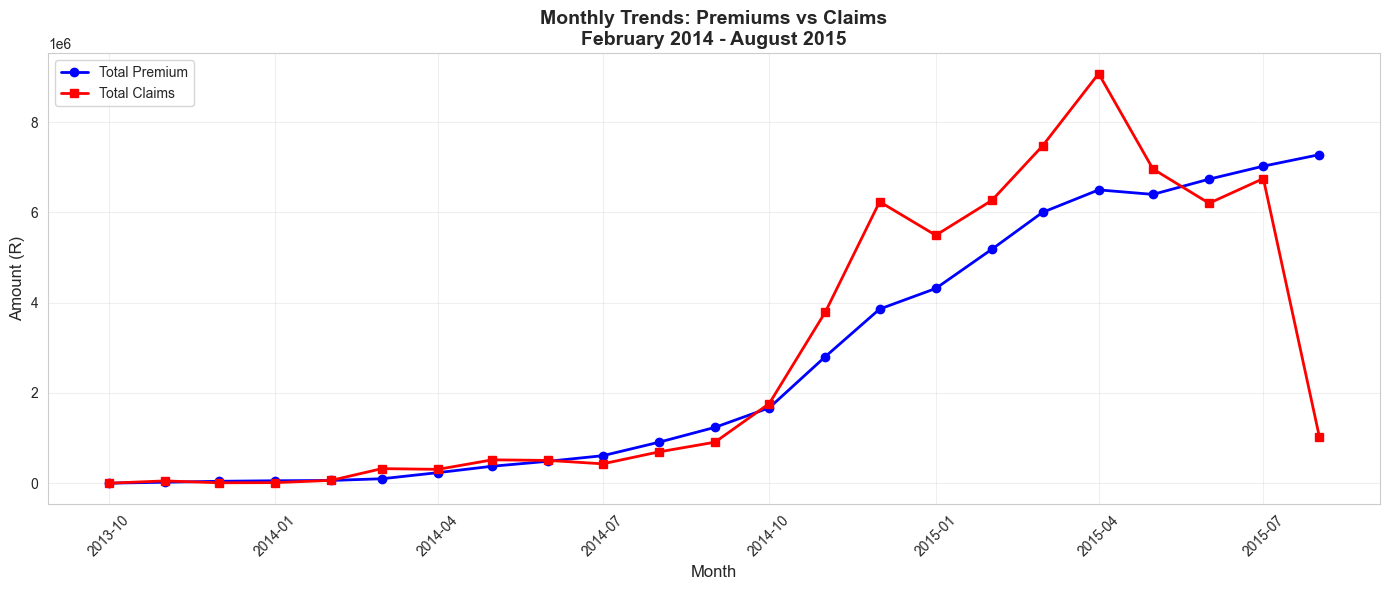


Monthly trends plot saved to outputs/plots/monthly_trends.png


In [26]:
# Monthly trends
if 'TransactionMonth' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    monthly_data = df.groupby('TransactionMonth').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    monthly_data.columns = ['Month', 'TotalPremium', 'TotalClaims', 'PolicyCount']
    monthly_data['LossRatio'] = (monthly_data['TotalClaims'] / monthly_data['TotalPremium']) * 100
    
    print("Monthly Trends:")
    print("="*80)
    print(monthly_data.to_string(index=False))
    
    # Visualize monthly trends
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    ax1.plot(monthly_data['Month'], monthly_data['TotalPremium'], 
             marker='o', linewidth=2, color='blue', label='Total Premium')
    ax1.plot(monthly_data['Month'], monthly_data['TotalClaims'], 
             marker='s', linewidth=2, color='red', label='Total Claims')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Amount (R)', fontsize=12)
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    plt.title('Monthly Trends: Premiums vs Claims\nFebruary 2014 - August 2015', 
              fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../outputs/plots/monthly_trends.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nMonthly trends plot saved to outputs/plots/monthly_trends.png")

## 10. Correlation Analysis

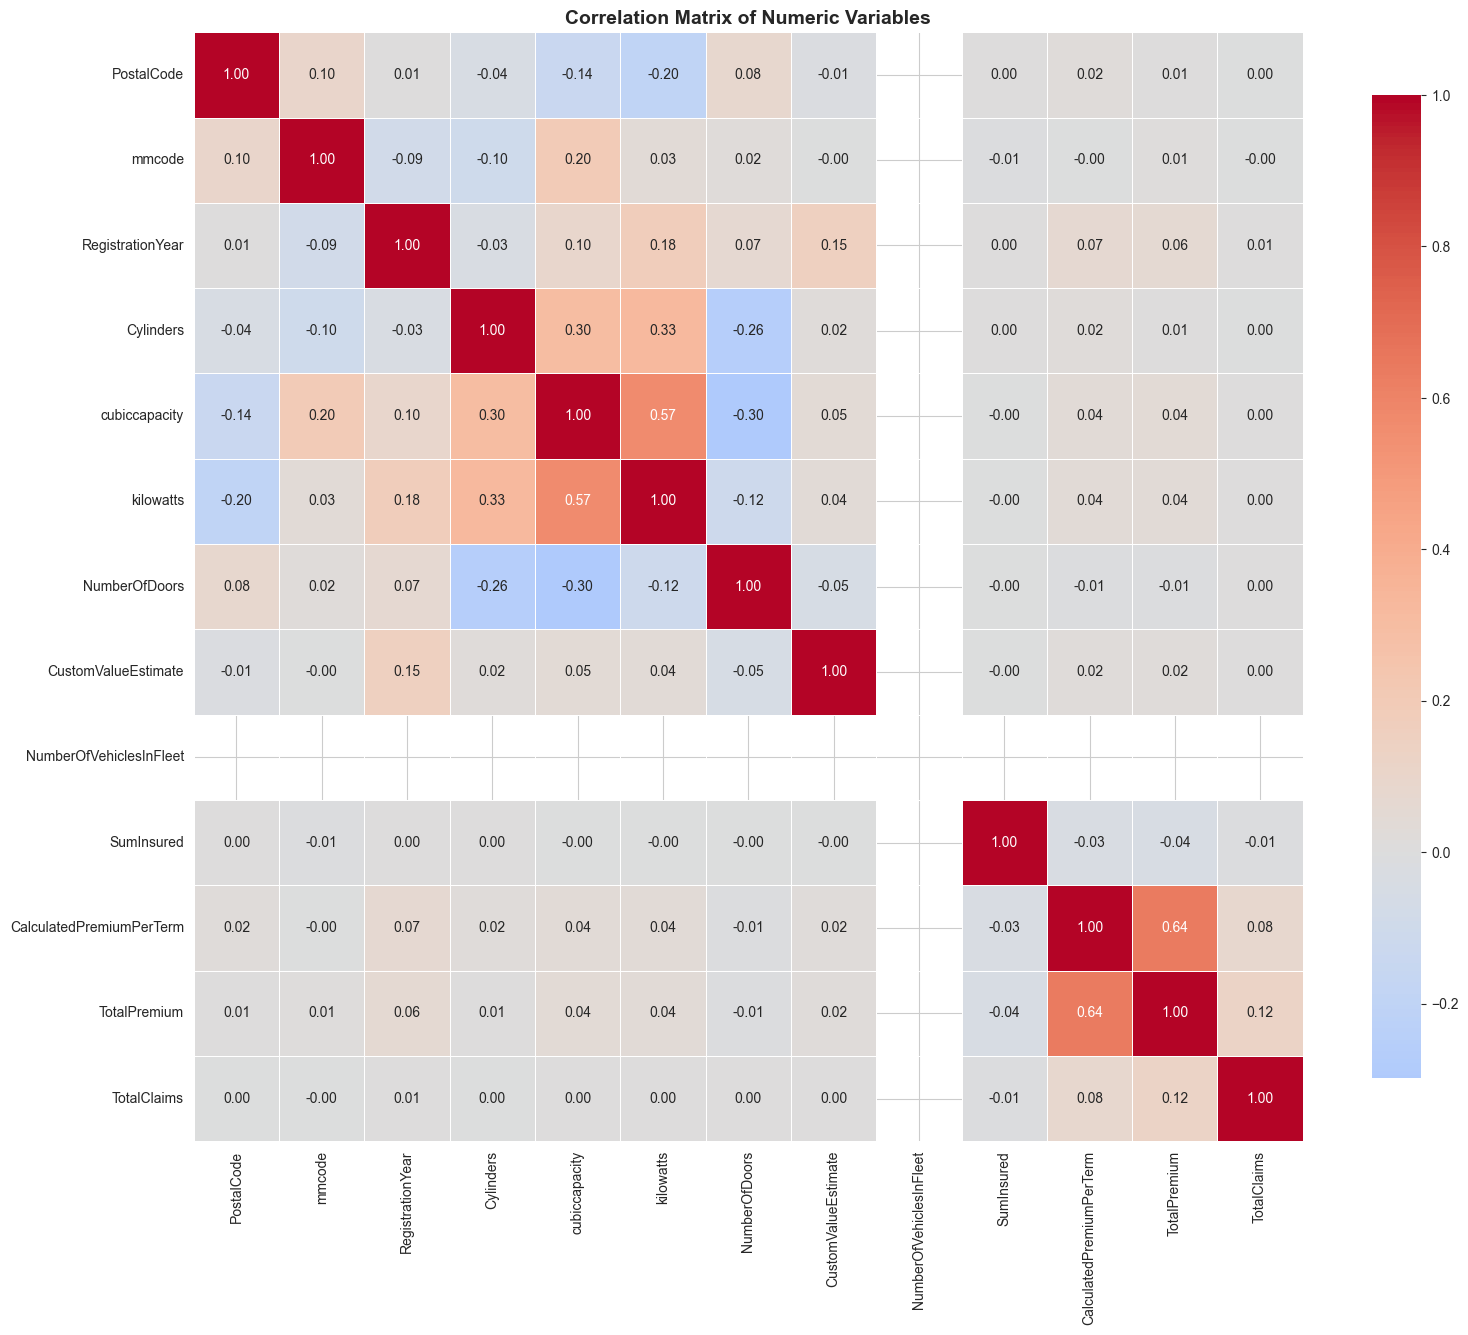

Correlation matrix saved to outputs/plots/correlation_matrix.png

Strong Correlations (|r| > 0.7):
No strong correlations found.


In [27]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns and temporal features
exclude_cols = ['UnderwrittenCoverID', 'PolicyID', 'TransactionYear', 'TransactionMonthNum', 'TransactionQuarter']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate correlation matrix
if len(numeric_cols) > 0:
    correlation_matrix = df[numeric_cols].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../outputs/plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Correlation matrix saved to outputs/plots/correlation_matrix.png")
    
    # Find strong correlations
    print("\nStrong Correlations (|r| > 0.7):")
    print("="*60)
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                strong_corr.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if strong_corr:
        for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"{var1} <-> {var2}: {corr:.3f}")
    else:
        print("No strong correlations found.")

## 11. Additional Visualizations

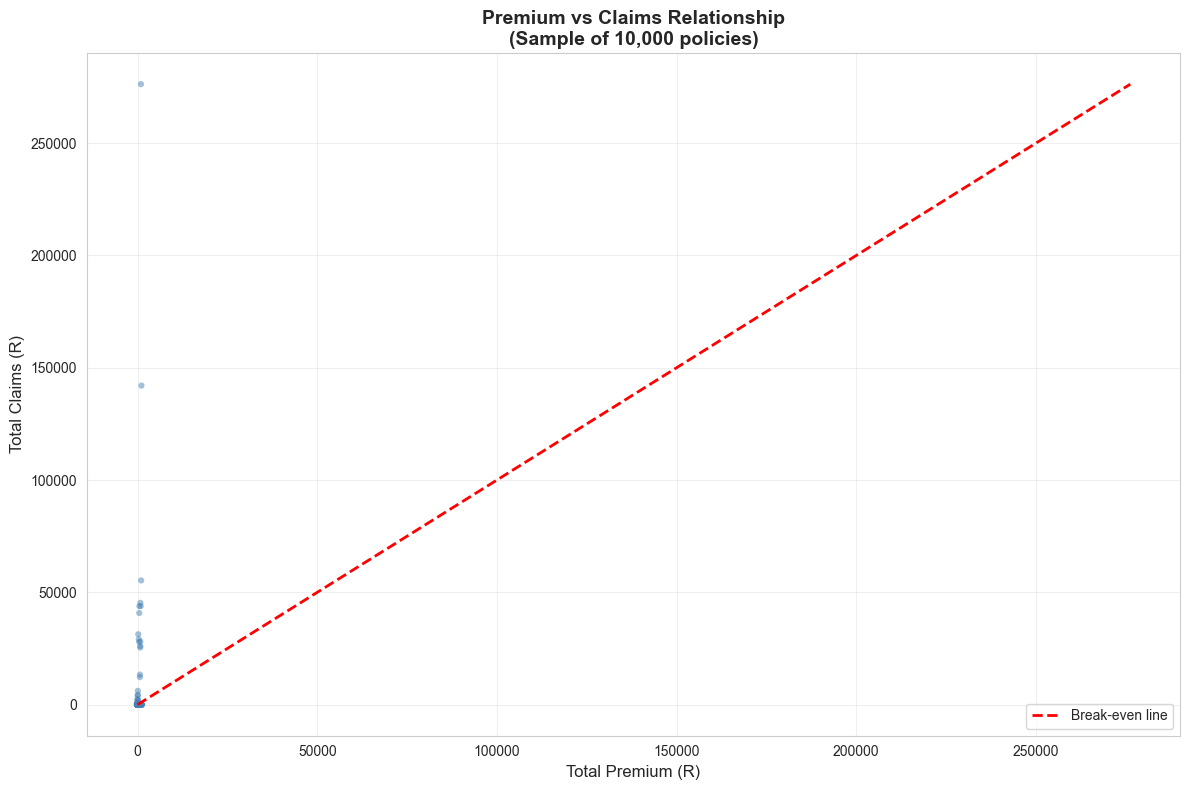

Scatter plot saved to outputs/plots/premium_vs_claims_scatter.png


In [28]:
# Premium vs Claims scatter plot
if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    # Sample data for better visualization
    sample_size = min(10000, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(df_sample['TotalPremium'], df_sample['TotalClaims'], 
                alpha=0.5, s=20, c='steelblue', edgecolors='none')
    
    # Add diagonal line (break-even)
    max_val = max(df_sample['TotalPremium'].max(), df_sample['TotalClaims'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Break-even line')
    
    plt.xlabel('Total Premium (R)', fontsize=12)
    plt.ylabel('Total Claims (R)', fontsize=12)
    plt.title(f'Premium vs Claims Relationship\n(Sample of {sample_size:,} policies)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs/plots/premium_vs_claims_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Scatter plot saved to outputs/plots/premium_vs_claims_scatter.png")

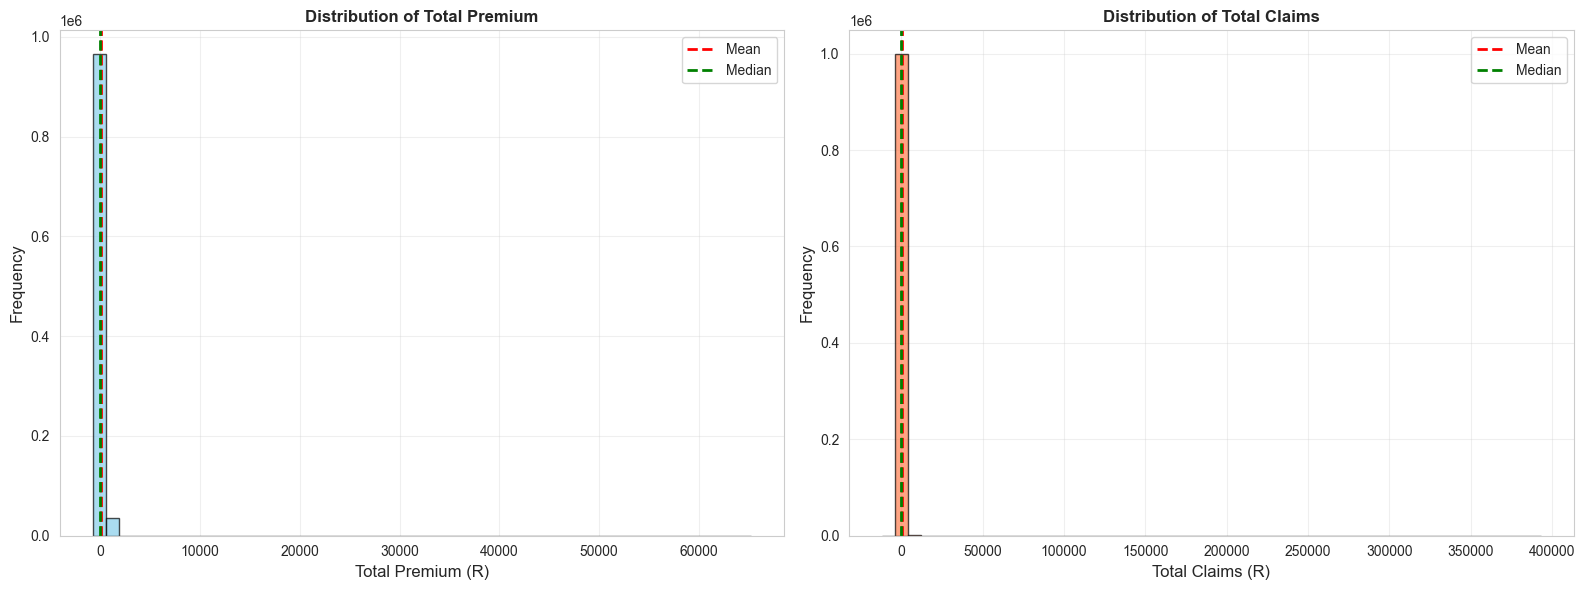

Distribution plots saved to outputs/plots/premium_claims_distributions.png


In [29]:
# Distribution of TotalPremium and TotalClaims
if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # TotalPremium distribution
    axes[0].hist(df['TotalPremium'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Total Premium (R)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Total Premium', fontsize=12, fontweight='bold')
    axes[0].axvline(df['TotalPremium'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0].axvline(df['TotalPremium'].median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # TotalClaims distribution
    axes[1].hist(df['TotalClaims'], bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Total Claims (R)', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('Distribution of Total Claims', fontsize=12, fontweight='bold')
    axes[1].axvline(df['TotalClaims'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[1].axvline(df['TotalClaims'].median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../outputs/plots/premium_claims_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Distribution plots saved to outputs/plots/premium_claims_distributions.png")

## 12. Summary and Key Findings

In [30]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS - SUMMARY")
print("="*80)

print("\n1. DATASET OVERVIEW")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total Columns: {len(df.columns)}")
print(f"   - Date Range: {df['TransactionMonth'].min()} to {df['TransactionMonth'].max()}")

print("\n2. FINANCIAL SUMMARY")
print(f"   - Total Premium Collected: R {df['TotalPremium'].sum():,.2f}")
print(f"   - Total Claims Paid: R {df['TotalClaims'].sum():,.2f}")
print(f"   - Overall Loss Ratio: {overall_loss_ratio:.2f}%")

print("\n3. DATA QUALITY")
print(f"   - Columns with Missing Values: {len(missing_data)}")
print(f"   - Duplicate Records: {df.duplicated().sum()}")

print("\n4. KEY INSIGHTS")
if 'Province' in df.columns:
    best_province = province_analysis.iloc[0]
    worst_province = province_analysis.iloc[-1]
    print(f"   - Best Province (Lowest Loss Ratio): {best_province['Province']} ({best_province['LossRatio']:.2f}%)")
    print(f"   - Worst Province (Highest Loss Ratio): {worst_province['Province']} ({worst_province['LossRatio']:.2f}%)")

print("\n5. VISUALIZATIONS CREATED")
print("   - Missing values analysis")
print("   - Loss ratio by province")
print("   - Loss ratio by vehicle type")
print("   - Loss ratio by gender")
print("   - Monthly trends (premiums vs claims)")
print("   - Boxplot of claims by vehicle type")
print("   - Correlation matrix")
print("   - Premium vs claims scatter plot")
print("   - Distribution plots")

print("\n6. NEXT STEPS")
print("   - Implement DVC for data version control (Task 2)")
print("   - Perform A/B hypothesis testing (Task 3)")
print("   - Build predictive models (Task 4)")

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*80)

EXPLORATORY DATA ANALYSIS - SUMMARY

1. DATASET OVERVIEW
   - Total Records: 1,000,098
   - Total Columns: 55
   - Date Range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00

2. FINANCIAL SUMMARY
   - Total Premium Collected: R 61,911,562.70
   - Total Claims Paid: R 64,867,546.17
   - Overall Loss Ratio: 104.77%

3. DATA QUALITY
   - Columns with Missing Values: 22
   - Duplicate Records: 0

4. KEY INSIGHTS
   - Best Province (Lowest Loss Ratio): Northern Cape (28.27%)
   - Worst Province (Highest Loss Ratio): Gauteng (122.20%)

5. VISUALIZATIONS CREATED
   - Missing values analysis
   - Loss ratio by province
   - Loss ratio by vehicle type
   - Loss ratio by gender
   - Monthly trends (premiums vs claims)
   - Boxplot of claims by vehicle type
   - Correlation matrix
   - Premium vs claims scatter plot
   - Distribution plots

6. NEXT STEPS
   - Implement DVC for data version control (Task 2)
   - Perform A/B hypothesis testing (Task 3)
   - Build predictive models (Task 4)

EDA COMPLET